In [ ]:
import numpy as np 
import pandas as pd

# plots
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

eventos = pd.read_csv('../Data/events.csv',low_memory=False)

In [2]:
eventos['timestamp'] = pd.to_datetime(eventos['timestamp'])

## Análisis sobre cuál campaña de marketing da más rédito

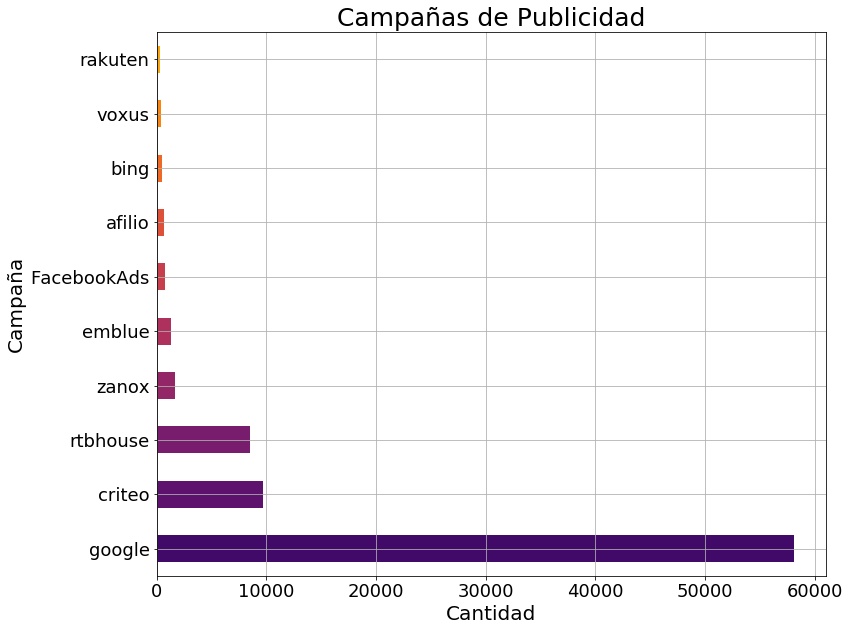

In [3]:
color = cm.inferno_r(np.linspace(.8,.2, 10))
plot = eventos['campaign_source'].value_counts().head(10).plot(kind = 'barh',figsize = (12,10),color = color,grid = True, fontsize=18)

plot.set_xlabel("Cantidad",fontsize=20)
plot.set_ylabel("Campaña",fontsize=20)
plot.set_title("Campañas de Publicidad", fontsize=25,color ="black")
plt.show()


Como se ve, claramente google es nuestro principal acceso al site mediante una campaña de marketing.

In [4]:
campañasSinGoogle = eventos['campaign_source'].value_counts()[1:].sum()
campañasGoogle = eventos['campaign_source'].value_counts().head(1).sum()

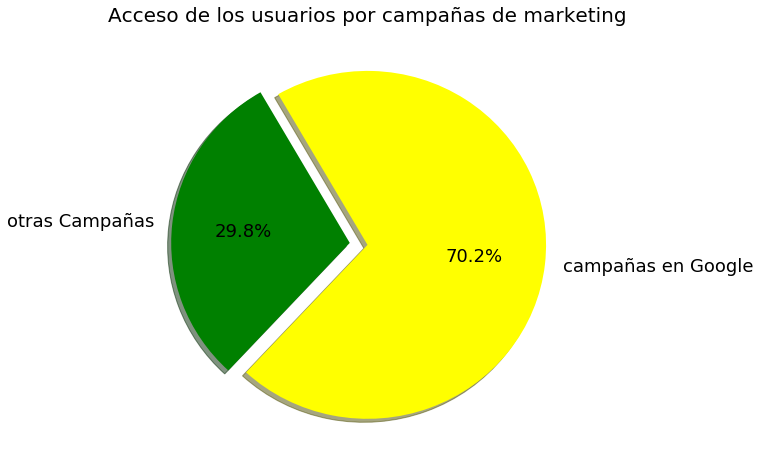

In [5]:
plt.figure(figsize=(8, 8))
sizes = [campañasSinGoogle, campañasGoogle]
nombres = ['otras Campañas', 'campañas en Google']
plt.title('Acceso de los usuarios por campañas de marketing', fontsize=20)
plt.pie(sizes, labels=nombres, autopct='%1.1f%%', startangle=120, colors=['green', 'yellow'], explode=(0.1, 0),shadow = True, textprops={'fontsize': 18})

plt.show()

El gráfico de torta muestra que de nuestros accesos de marketing, el 70% es ingresado por campañas de google(tiene sentido ya qué google es el búscador principal de la web) y las demás campañas en conjunto no logran llegar al 30%.

Está claro que el sector de marketing debería centrar sus operaciones sobre la plataforma de Google ya que es la de más efectiva (y por mucho).

## Análisis sobre el rendimiento de las campañas de marketing

In [6]:
analisisSobreCampañasDeMKT = eventos.loc[:,['timestamp','person','event','campaign_source']]
analisisSobreCampañasDeMKT = analisisSobreCampañasDeMKT.loc[analisisSobreCampañasDeMKT['campaign_source'] != 'Unknown',:]

personasQueIngresaronPorUnaCampañaDeMkt = analisisSobreCampañasDeMKT.groupby(['person','campaign_source']).agg(np.size)['timestamp'].reset_index()

personTopsQueIngresanPorCampañasDeMkt = set(personasQueIngresaronPorUnaCampañaDeMkt['person'].tolist())
cantidadDePersonTopsQueIngresanPorCampañasDeMkt = len(personTopsQueIngresanPorCampañasDeMkt)

In [7]:
cantidadDePersonTopsQueIngresanPorCampañasDeMktYCompraron = eventos.loc[(eventos['event'] == 'conversion') & eventos['person'].isin(personTopsQueIngresanPorCampañasDeMkt)]['person'].count()

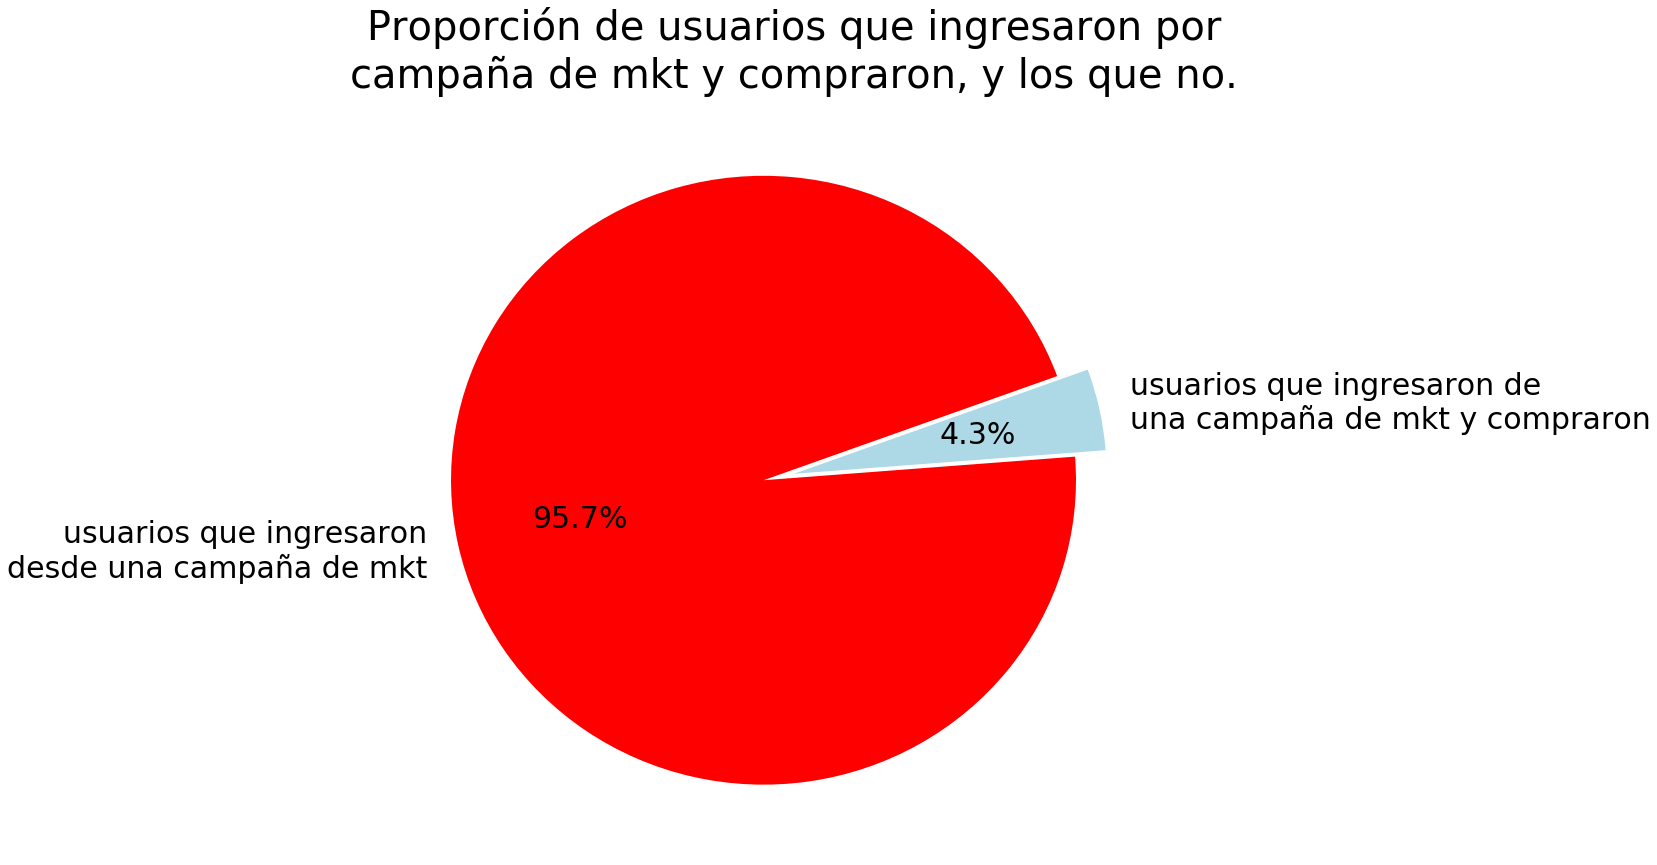

In [8]:
plt.figure(figsize=(14, 14))
sizes = [cantidadDePersonTopsQueIngresanPorCampañasDeMkt, cantidadDePersonTopsQueIngresanPorCampañasDeMktYCompraron]
nombres = ['usuarios que ingresaron\ndesde una campaña de mkt', 'usuarios que ingresaron de\nuna campaña de mkt y compraron']
plt.title('Proporción de usuarios que ingresaron por\ncampaña de mkt y compraron, y los que no.', fontsize=40)
plt.pie(sizes, labels=nombres, autopct='%1.1f%%', startangle=20, colors=['red', 'lightblue'], explode=(0.1, 0), textprops={'fontsize': 30})
plt.show()

Como se puede dilucidar, las campañas de marketin tienen muy poca efectividad sobre nuestros usuarios.
Solamente apenas un poco más del 4% de nuestros usuarios ingresados desde una campaña de marketing realizan alguna conversion.